# Hough Transform: Line Detection (Polar Coordinates)

Due to undefined value of slope for vertical lines in cartesian coordinates, we have to move to polar coordinates. In polar coordinates line is define by $\rho$ and $\theta$ where $\rho$ is the norm distance of the line from origin. $\theta$ is the angle between the norm and the horizontal $x$ axis. The equation of line in terms of $\rho$ and $\theta$ now is 

$$y = \frac{-cos(\theta)}{sin(\theta)} x + \frac{\rho}{sin(\theta)}$$

and 

$$\rho = x cos(\theta)  + y sin(\theta)$$

<img style="width:60%" class="center" src="media/hough_deriving-rho.png">


The Range of values of $\rho$ and $\theta$ 

* $\theta$: in polar coordinate takes value in range of -90 to 90 
* The maximum norm distance is given by diagonal distance which is $\rho_{max} = \sqrt{x^2 + y^2}$

So $\rho$ has values in range from $-\rho_{max}$ to $\rho_{max}$


## Algorithm

Basic Algorithm steps for Hough transform is : 

```
# Extract edges of the image (For example, using Canny)

1. initialize parameter space rs, thetas
2. Create accumulator array and initialize to zero
3. for each edge pixel     
4.     for each theta
5.         calculate r = x cos(theta) + y sin(theta)
6.         Increment accumulator at r, theta
7. Find Maximum values in accumulator (lines)

Extract related r, theta
```

## Basic Implementation

At first import used libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Lets define function that builds the accumulator in Hough domain

In [10]:
def houghLine(image):
    #Get image dimensions
    # y for rows and x for columns 
    Ny = image.shape[0]
    Nx = image.shape[1]

    #Max diatance is diagonal one 
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))

    # 1. initialize parameter space rs, thetas
    # Theta in range from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90, 90))
    #Range of radius
    rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)
    
    #2. Create accumulator array and initialize to zero
    accumulator = np.zeros((2 * Maxdist, len(thetas)))

    #3. Loop for each edge pixel 
    for y in range(Ny):
        for x in range(Nx):
            # Check if it is an edge pixel
            #  NB: y -> rows , x -> columns
            if image[y,x] > 0:
                #4. Loop for each theta
                # Map edge pixel to hough space
                 for k in range(len(thetas)):

                    #5. calculate $\rho$
                    # Calculate space parameter
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])

                    #6. Increment accumulator at r, theta
                    # Update the accumulator
                    # N.B: r has value -max to max
                    # map r to its idx 0 : 2*max
                    accumulator[int(r) + Maxdist,k] += 1
    return accumulator, thetas, rs

In [3]:
??np.linspace

Now lets try to test our houghLine function as follow

### One edge point image

Lets see Hough transform for an image with only one edge point.

<Figure size 432x288 with 0 Axes>

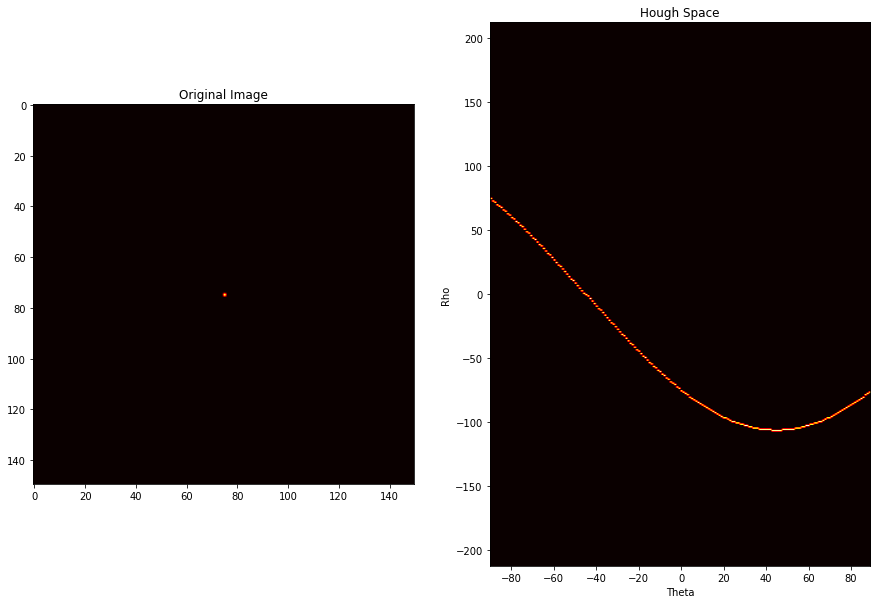

In [4]:
image_1p = np.zeros((150,150))
image_1p[75, 75] = 1
accumulator_1p, thetas_1p, rhos_1p = houghLine(image_1p)

plt.set_cmap('seismic')

fig, ax = plt.subplots(1,2,figsize = (15, 10))
ax[0].set_title('Original Image')
ax[0].imshow(image_1p,cmap=cm.hot,interpolation='bilinear')

ax[1].set_title('Hough Space')
limits = [ np.rad2deg(thetas_1p[0]), np.rad2deg(thetas_1p[-1]), rhos_1p[0], rhos_1p[-1]]
ax[1].imshow(accumulator_1p, aspect='auto', extent= limits, cmap=cm.hot,interpolation='bilinear')
ax[1].set_xlabel('Theta')
ax[1].set_ylabel('Rho')

plt.show()

Now lets try to test our houghLine function as follow

### One line image

Lets see Hough transform for an image with only one edge point.

In [41]:
?np.linspace

<Figure size 432x288 with 0 Axes>

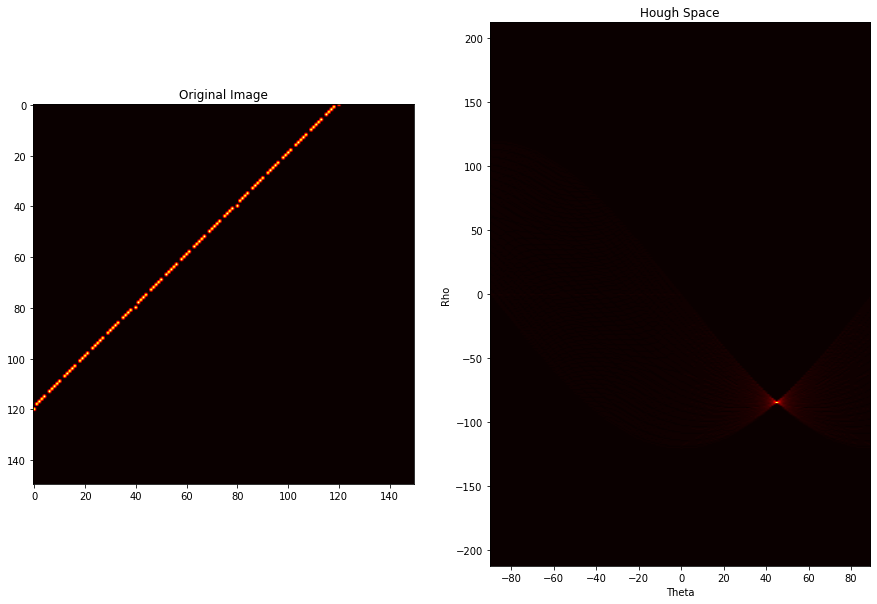

In [5]:
image_1l = np.zeros((150,150))
image_1l[np.linspace(0,120,100).astype(int), np.linspace(120,0,100).astype(int)] = 1
accumulator_1l, thetas_1l, rhos_1l = houghLine(image_1l)

plt.set_cmap('seismic')

fig, ax = plt.subplots(1,2,figsize = (15, 10))
ax[0].set_title('Original Image')
ax[0].imshow(image_1l,cmap=cm.hot,interpolation='bilinear')

ax[1].set_title('Hough Space')
limits = [ np.rad2deg(thetas_1l[0]), np.rad2deg(thetas_1l[-1]), rhos_1l[0], rhos_1l[-1]]
ax[1].imshow(accumulator_1l, aspect='auto', extent= limits ,cmap=cm.hot,interpolation='bilinear')
ax[1].set_xlabel('Theta')
ax[1].set_ylabel('Rho')

plt.show()

### Two lines image


<Figure size 432x288 with 0 Axes>

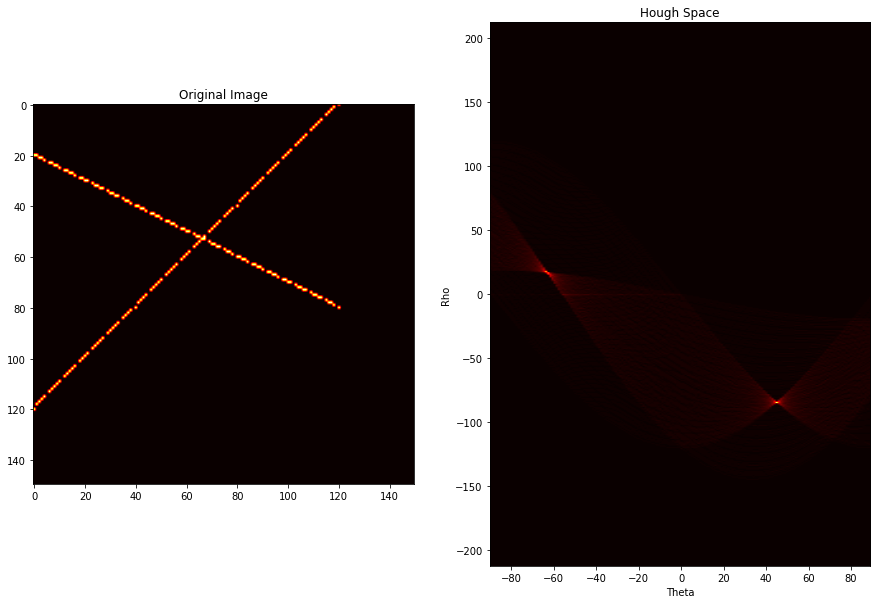

In [6]:
image_2l = np.zeros((150,150))
image_2l[np.linspace(0,120,100).astype(int), np.linspace(120,0,100).astype(int)] = 1
image_2l[np.linspace(20,80,100).astype(int), np.linspace(0,120,100).astype(int)] = 1
accumulator_2l, thetas_2l, rhos_2l = houghLine(image_2l)

plt.set_cmap('seismic')

fig, ax = plt.subplots(1,2,figsize = (15, 10))
ax[0].set_title('Original Image')
ax[0].imshow(image_2l,cmap=cm.hot,interpolation='bilinear')

ax[1].set_title('Hough Space')
limits = [ np.rad2deg(thetas_2l[0]), np.rad2deg(thetas_2l[-1]), rhos_2l[0], rhos_2l[-1]]
ax[1].imshow(accumulator_2l, aspect='auto', extent= limits, cmap=cm.hot,interpolation='bilinear' )
ax[1].set_xlabel('Theta')
ax[1].set_ylabel('Rho')

plt.show()

### Real images

In [50]:
!ls images

Chess_Board.png  girlWithScarf.png	    peppers.png      tesla.jpg
chess.jpg	 House.jpg		    Pyramids2.jpg
colortrui.png	 Leopard2.jpg		    some-pigeon.jpg
emara.jpg	 leopard-africa-safari.jpg  tajMahal.jpg


In [23]:
from PIL import Image
import numpy as np
from cvutils import rgb2gray
import canny_edge_detector as ced

imgs = ['images/Chess_Board.png', 'images/chess.jpg', 'images/tesla.jpg', 'images/emara.jpg']
imgs = [ rgb2gray( np.array(Image.open(img))) for img in imgs ]

In [21]:
ced_obj = ced.CannyEdgeDetector(imgs, lowthreshold=0.1, highthreshold=0.3,sigma=1,kernel_size=11)
ced_imgs = ced_obj.detect()
hough_imgs = [  houghLine(img) for img in ced_imgs ]

In [ ]:
fig, ax = plt.subplots(len(imgs),4,figsize = (10, 15))

for i,(img,ced_img,(accumulator, thetas, rhos)) in enumerate(zip(imgs,ced_imgs,hough_imgs)):
    print(ax[0])
    plt.set_cmap('Greys')
    ax[i , 0].set_title('Original Image')
    ax[i , 0].imshow(img)

    ax[i , 1].set_title('Canny Image')
    ax[i , 1].imshow(ced_img,cmap=cm.hot)
    
    ax[i,2].set_title('Hough Space')
    limits = [ np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[0], rhos[-1]]
    ax[i,2].imshow(accumulator, aspect='auto', extent= limits, cmap=cm.hot,interpolation='bilinear' )
    ax[i,2].set_xlabel('Theta')
    ax[i,2].set_ylabel('Rho')
    
    ax[i,3].set_title('Histogram for Hough Accumulator')
    ax[i,3].hist(accumulator, bins='auto')
    
plt.show()



## Hough Circle 

The same idea is applied for other shapes. Once you have parametric equation that describes the shape you can build parameter space and detect that shape. For the circle 

$ r^2 = (x-x_0)^2 + (y-y_0)^2$

Circle parameters are center $(x_0, y_0)$ and radius $r$

Your parameter space now is 3D parameter space.

<img style="width:80%" src="../images/HoughCir.png">

Think how to extend the basic Hough line transform to detect circles.


## Useful links

[Understanding Hough transform in python](https://alyssaq.github.io/2014/understanding-hough-transform/)

[OpenCV Hough Line Transform](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

[Scikit-image Hough Line](http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)

[OpenCV Hough Circle](https://docs.opencv.org/3.1.0/da/d53/tutorial_py_houghcircles.html)